## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_selection import SelectKBest, mutual_info_classif



### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('data.csv')  


## Data Understanding

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Preparation / Preprocessing

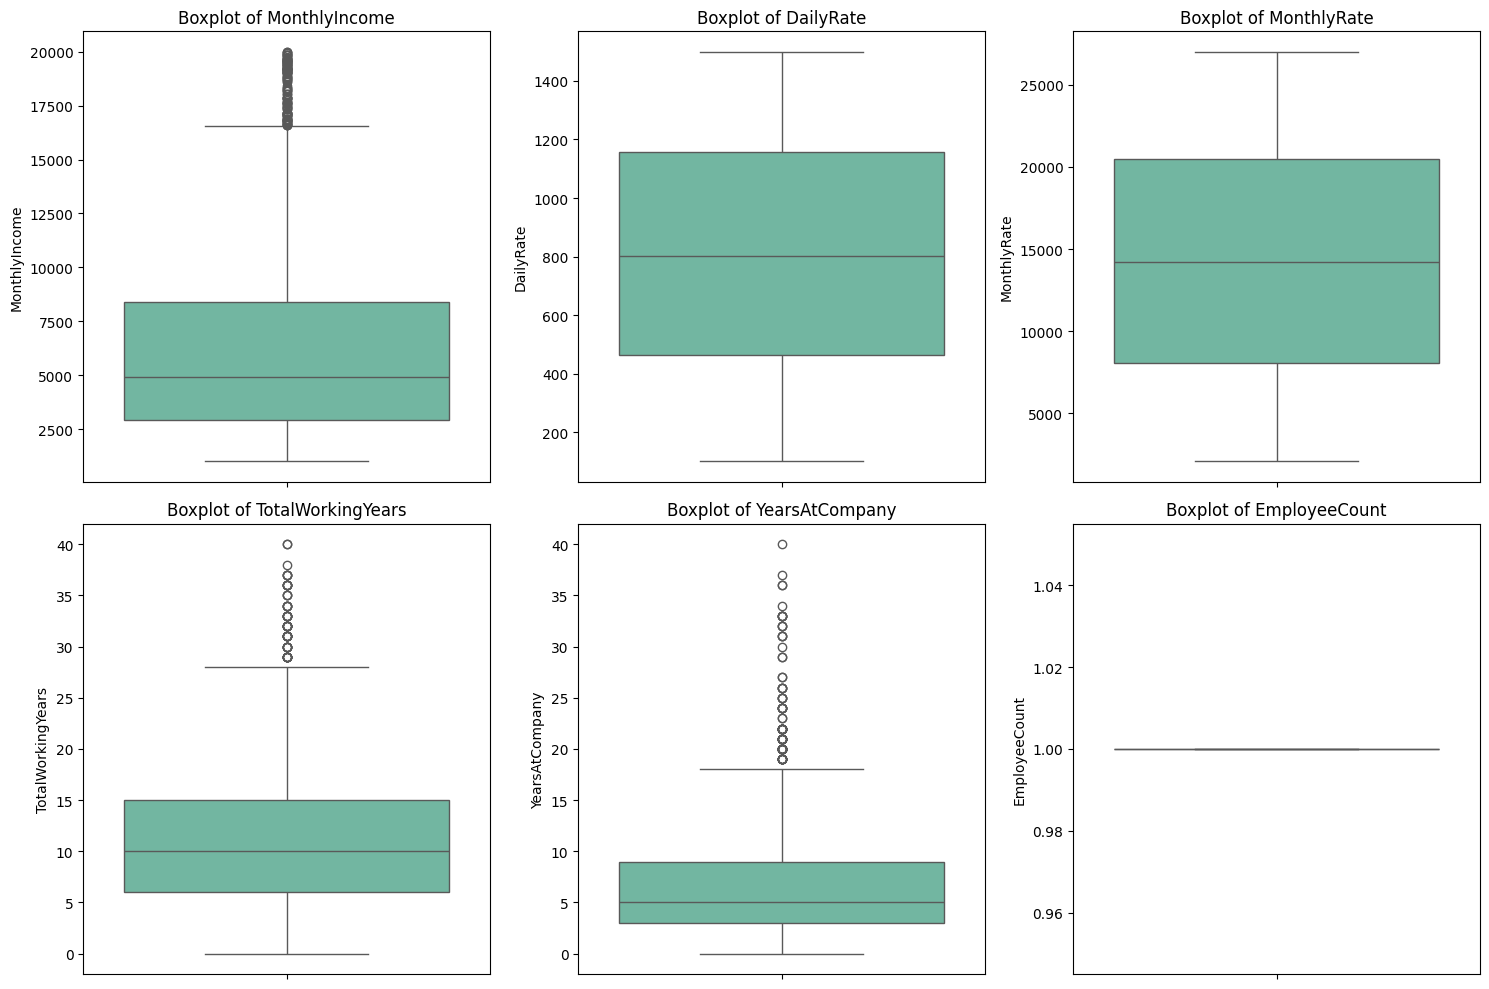

Outlier Analysis Report

Column: DailyRate
Number of outliers: 0
Lower bound: -573.00, Upper bound: 2195.00
Min value: 102.00, Max value: 1499.00

Column: EmployeeCount
Number of outliers: 0
Lower bound: 1.00, Upper bound: 1.00
Min value: 1.00, Max value: 1.00

Column: MonthlyIncome
Number of outliers: 114
Lower bound: -5291.00, Upper bound: 16581.00
Min value: 1009.00, Max value: 19999.00

Column: MonthlyRate
Number of outliers: 0
Lower bound: -10574.75, Upper bound: 39083.25
Min value: 2094.00, Max value: 26999.00

Column: TotalWorkingYears
Number of outliers: 63
Lower bound: -7.50, Upper bound: 28.50
Min value: 0.00, Max value: 40.00

Column: YearsAtCompany
Number of outliers: 104
Lower bound: -6.00, Upper bound: 18.00
Min value: 0.00, Max value: 40.00


In [6]:
# Set the style for the plots - using a style that's compatible with newer matplotlib versions
sns.set_palette("Set2")

# Select only numerical columns that can have outliers
# Include ID columns, binary columns, and columns with fixed values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col  in ['MonthlyIncome', 'DailyRate', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'EmployeeCount']]


# For a more detailed view of specific columns with potential outliers
columns_with_potential_outliers = ['MonthlyIncome', 'DailyRate', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany','EmployeeCount']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_with_potential_outliers):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
# plt.savefig('specific_boxplots.png')
plt.show()  # Display the specific boxplots in the notebook

# Identify outliers using IQR method
print("Outlier Analysis Report")
print("======================")

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Min value: {df[col].min():.2f}, Max value: {df[col].max():.2f}")
        

In [7]:
df.isnull().sum() 



EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [8]:
# Count null values in Attrition column
print(df['Attrition'].isnull().sum())

# Remove rows with null values in Attrition column
df = df.dropna(subset=['Attrition'])



412


In [9]:
df['Attrition'].isnull().sum() # Check if there are any null values in Attrition column

np.int64(0)

Exploratory Data Analysis (EDA)

Basic Statistics for Numerical Features:
        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1058.000000  1058.000000  1058.000000  1058.000000       1058.000000   
mean    736.656900    37.055766     0.169187   809.542533          8.978261   
std     427.440538     9.410421     0.375094   408.478049          8.040608   
min       2.000000    18.000000     0.000000   102.000000          1.000000   
25%     364.250000    30.000000     0.000000   465.250000          2.000000   
50%     731.500000    36.000000     0.000000   817.500000          7.000000   
75%    1117.750000    43.000000     0.000000  1168.500000         13.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1058.000000         1058.0              1058.000000  1058.000000   
mean      2.879017            1.0                 2.712665    65

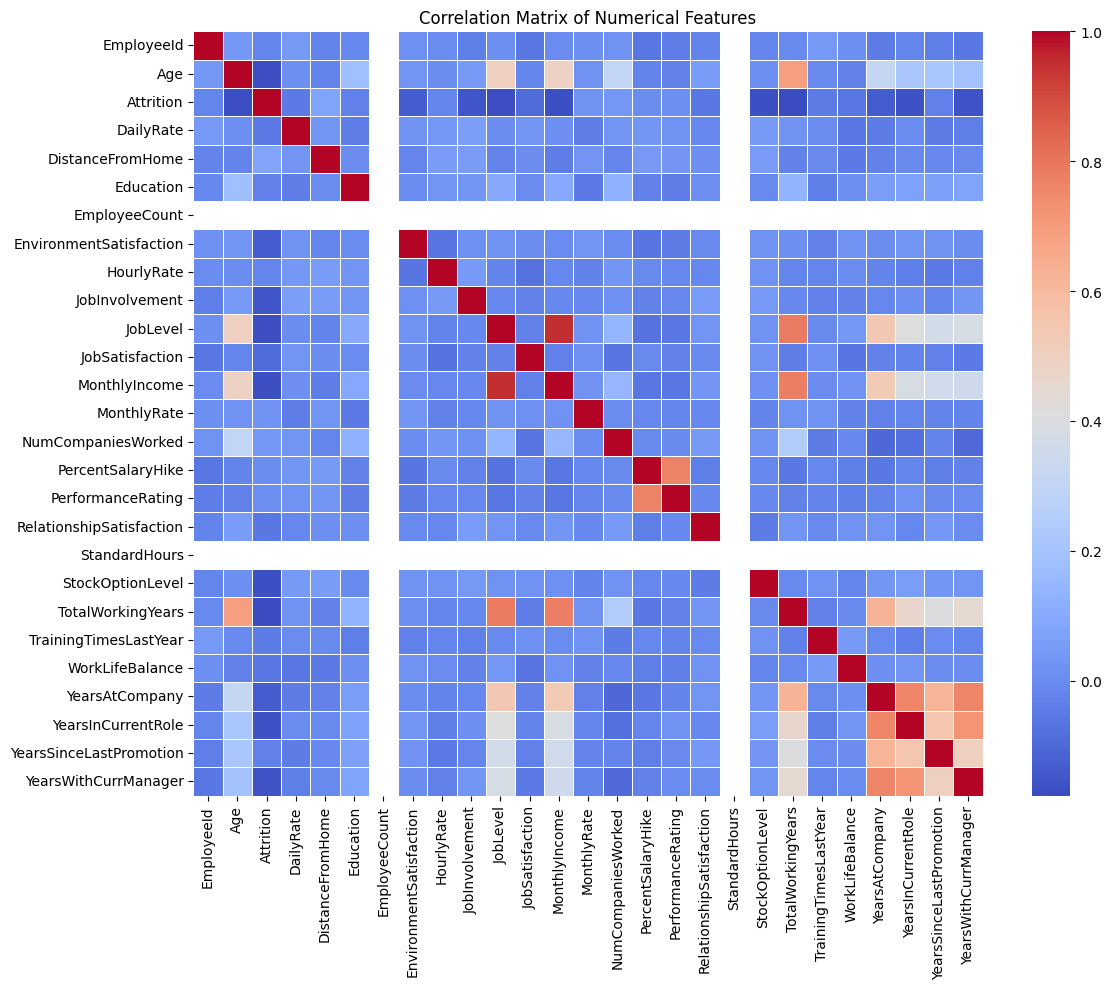


Categorical Features Analysis:

BusinessTravel Distribution:
BusinessTravel
Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

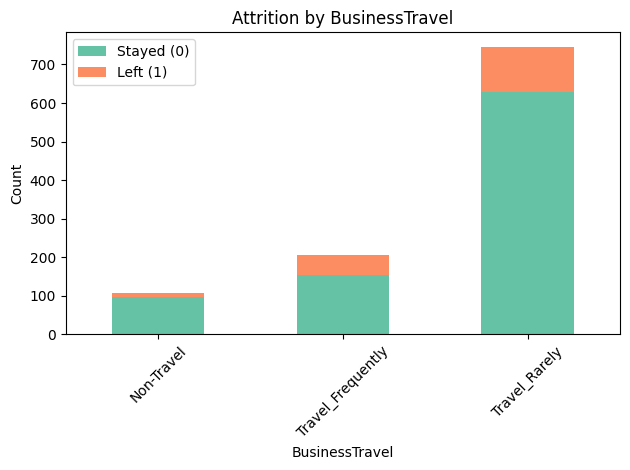


Department Distribution:
Department
Research & Development    701
Sales                     319
Human Resources            38
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

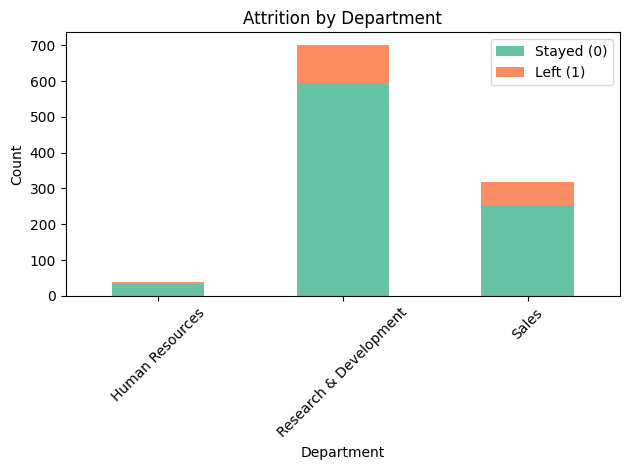


EducationField Distribution:
EducationField
Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

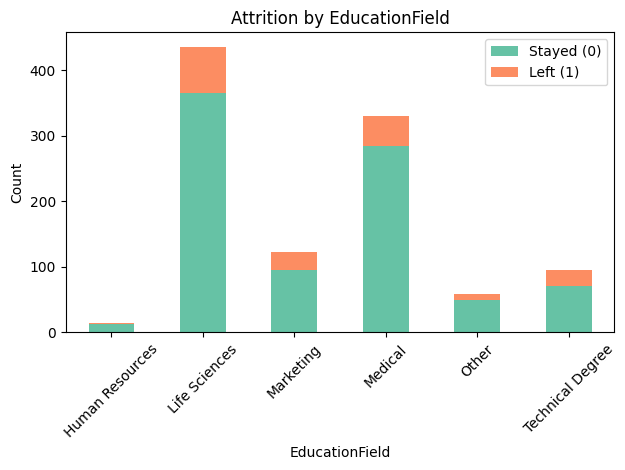


Gender Distribution:
Gender
Male      620
Female    438
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

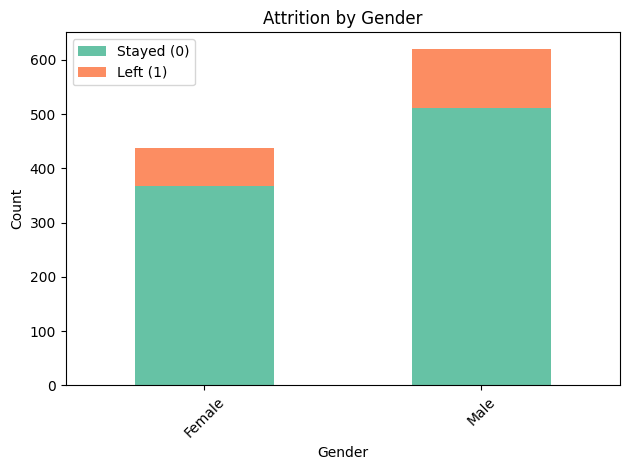


JobRole Distribution:
JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

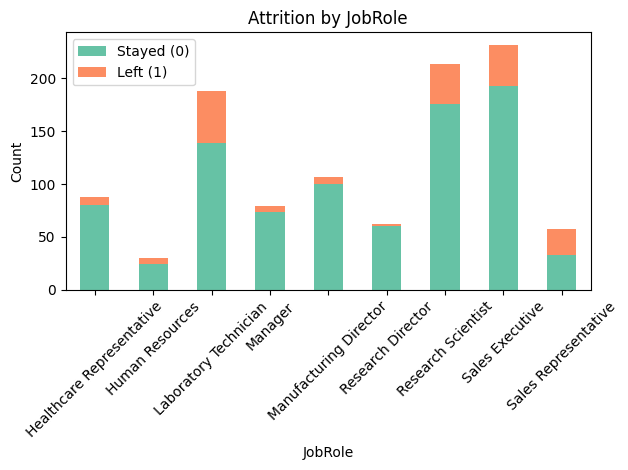


MaritalStatus Distribution:
MaritalStatus
Married     464
Single      352
Divorced    242
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

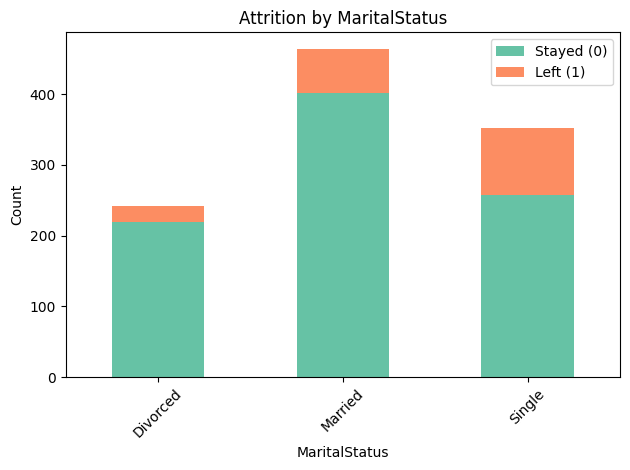


Over18 Distribution:
Over18
Y    1058
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

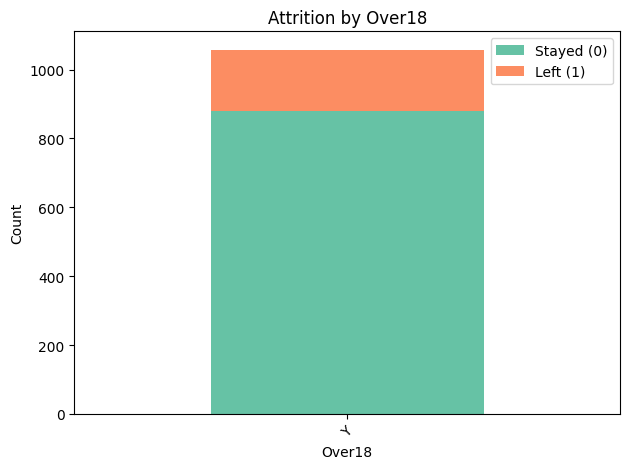


OverTime Distribution:
OverTime
No     751
Yes    307
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

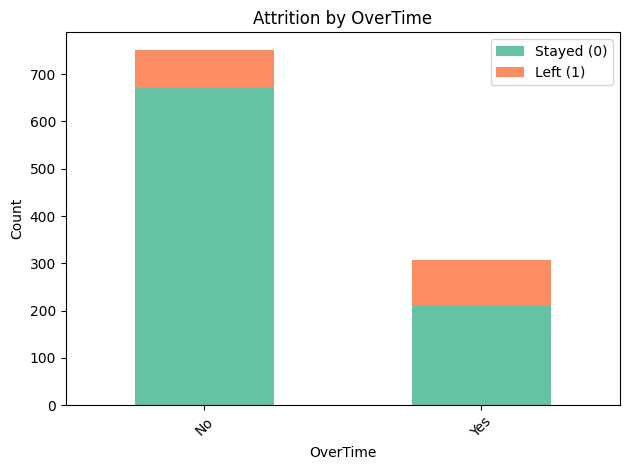

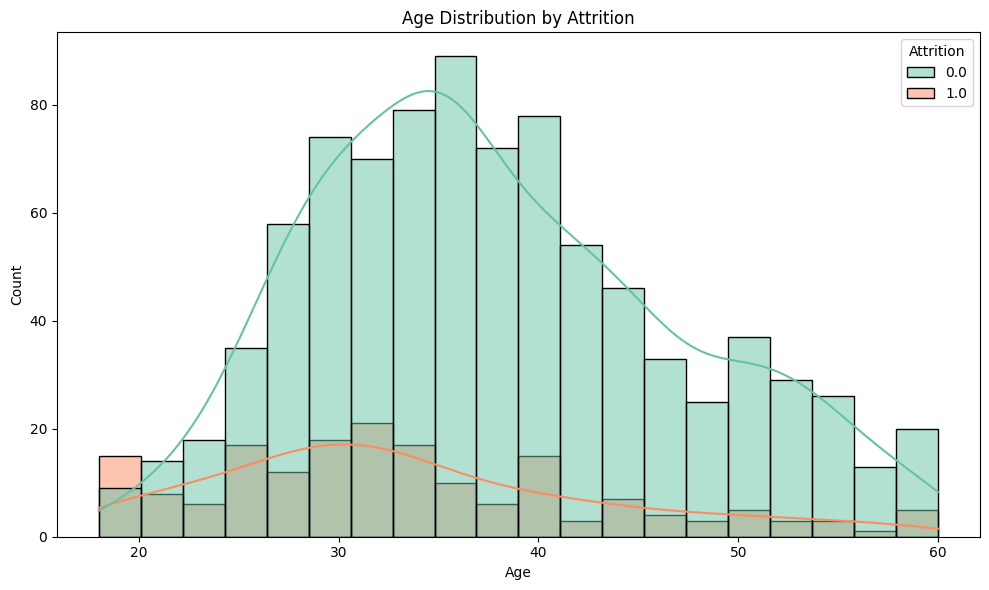

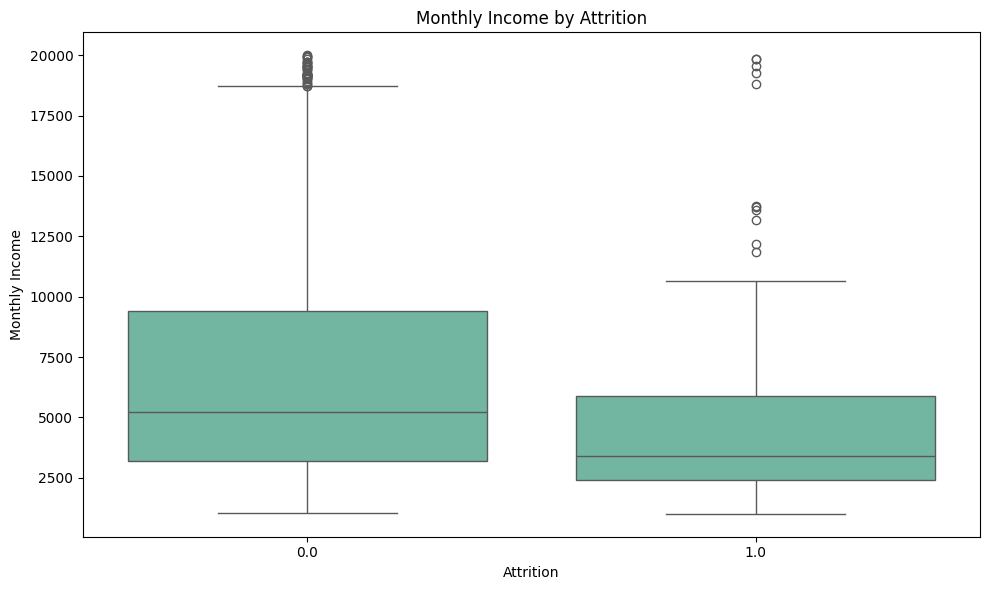

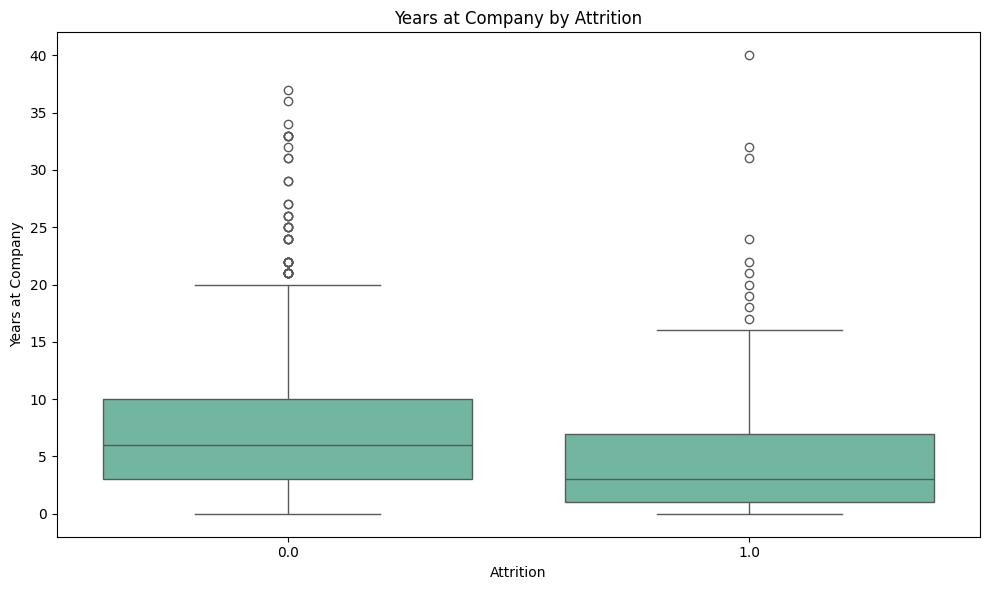

In [10]:
# Exploratory Data Analysis (EDA)
print("Exploratory Data Analysis (EDA)")
print("===============================")

# Basic statistics for numerical columns
print("\nBasic Statistics for Numerical Features:")
print(df.describe())

# Check data types and information
print("\nData Types and Information:")
print(df.info())

# Correlation analysis
print("\nCorrelation with Attrition:")
# Convert Attrition to numeric if it's not already
df['Attrition'] = df['Attrition'].astype(float)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlations = numeric_df.corr()['Attrition'].sort_values(ascending=False)
print(correlations)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Categorical features analysis
print("\nCategorical Features Analysis:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())
    
    # Visualize categorical features vs Attrition
    plt.figure(figsize=(10, 6))
    attrition_by_category = df.groupby([col, 'Attrition']).size().unstack()
    attrition_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Attrition by {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(['Stayed (0)', 'Left (1)'])
    plt.tight_layout()
    plt.show()

# Age distribution analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Salary (MonthlyIncome) vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()

# Years at company vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.tight_layout()
plt.show()


Attrition Distribution:
Attrition
0.0    879
1.0    179
Name: count, dtype: int64
Percentage of employees who left: 16.92%
Percentage of employees who stayed: 83.08%


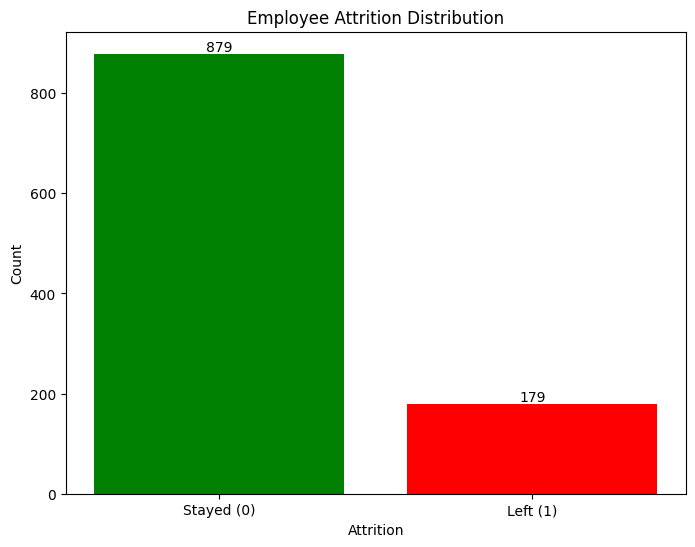

In [11]:
# Display the distribution of Attrition values (0 and 1)
attrition_counts = df['Attrition'].value_counts()
print("Attrition Distribution:")
print(attrition_counts)
print(f"Percentage of employees who left: {(attrition_counts[1.0] / len(df) * 100):.2f}%")
print(f"Percentage of employees who stayed: {(attrition_counts[0.0] / len(df) * 100):.2f}%")

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Stayed (0)', 'Left (1)'], attrition_counts.values, color=['green', 'red'])
plt.title('Employee Attrition Distribution')
plt.ylabel('Count')
plt.xlabel('Attrition')
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v + 5, str(v), ha='center')
plt.show()


Top features by mutual information with Attrition:
                          Feature     Score
43                   OverTime_Yes  0.041769
0                             Age  0.031563
20             YearsInCurrentRole  0.027609
15               StockOptionLevel  0.027548
9                   MonthlyIncome  0.022070
4         EnvironmentSatisfaction  0.021671
22           YearsWithCurrManager  0.019979
6                  JobInvolvement  0.018102
7                        JobLevel  0.017964
34  JobRole_Laboratory Technician  0.016716


C:\Users\Swift GO 14\AppData\Local\Temp\ipykernel_62888\1874584723.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=top_features, palette='coolwarm')


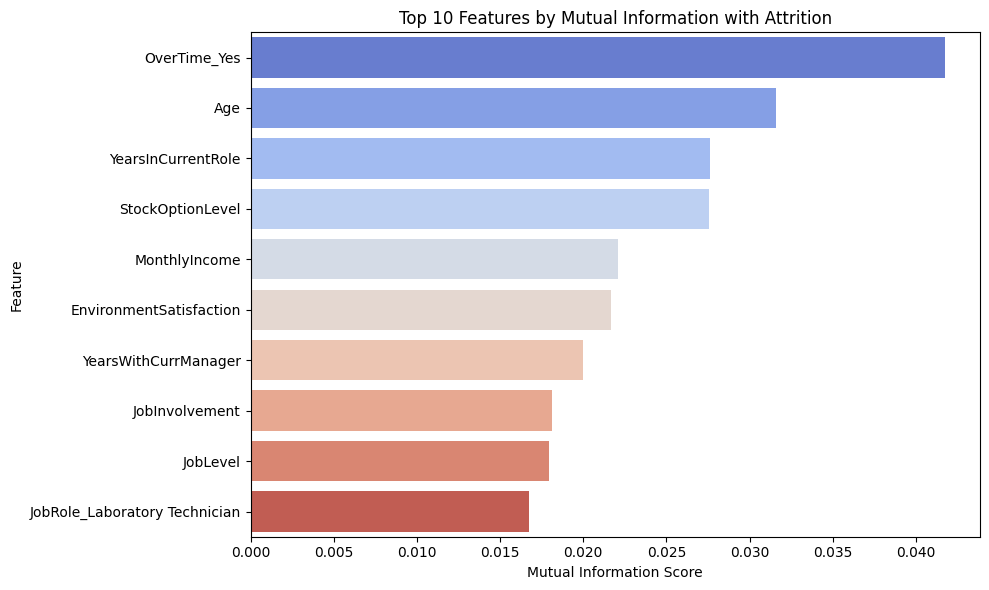


Selected features for modeling:
['OverTime_Yes', 'Age', 'YearsInCurrentRole', 'StockOptionLevel', 'MonthlyIncome', 'EnvironmentSatisfaction', 'YearsWithCurrManager', 'JobInvolvement', 'JobLevel', 'JobRole_Laboratory Technician']

Reduced feature set from 44 to 10 features


In [12]:
# Analyze feature importance for predicting Attrition using mutual_info_classif

# Separate features and target
X = df.drop(['Attrition', 'EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)
y = df['Attrition']

# Handle categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Apply mutual_info_classif to select the best features
selector = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(X_encoded, y)

# Get feature importance scores
feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Score': selector.scores_
})

# Sort by importance
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Display top features
print("Top features by mutual information with Attrition:")
print(feature_scores.head(10))

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_scores.head(10)
sns.barplot(x='Score', y='Feature', data=top_features, palette='coolwarm')
plt.title('Top 10 Features by Mutual Information with Attrition')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Create a list of selected features
selected_features = feature_scores.head(10)['Feature'].tolist()
print("\nSelected features for modeling:")
print(selected_features)

# Create a new dataframe with only the selected features
X_selected = X_encoded[selected_features]
print(f"\nReduced feature set from {X_encoded.shape[1]} to {X_selected.shape[1]} features")


## Modeling

In [13]:
# Use the selected features from feature selection step
X = X_selected  # Using the selected features from previous step
y = df['Attrition']  # Target variable

In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42, sampling_strategy=0.8)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [18]:
model = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_resampled, y_resampled)

c:\Users\Swift GO 14\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:45:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
from xgboost import XGBClassifier

model1 = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model1.fit(X_train, y_train)


c:\Users\Swift GO 14\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:45:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluation

In [27]:
y_proba = model.predict_proba(X_test)[:, 1]

# --- 7. Tuning threshold (default 0.5 bisa diturunkan jadi 0.3 misalnya) ---
threshold = 0.5
y_pred = (y_proba > threshold).astype(int)

# --- 8. Evaluasi hasil ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[147  29]
 [ 18  18]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       176
         1.0       0.38      0.50      0.43        36

    accuracy                           0.78       212
   macro avg       0.64      0.67      0.65       212
weighted avg       0.80      0.78      0.79       212

Accuracy Score: 0.7783018867924528


In [28]:
y_proba = model1.predict_proba(X_test)[:, 1]

# --- 7. Tuning threshold (default 0.5 bisa diturunkan jadi 0.3 misalnya) ---
threshold = 0.5
y_pred = (y_proba > threshold).astype(int)

# --- 8. Evaluasi hasil ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[162  14]
 [ 23  13]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       176
         1.0       0.48      0.36      0.41        36

    accuracy                           0.83       212
   macro avg       0.68      0.64      0.66       212
weighted avg       0.81      0.83      0.82       212

Accuracy Score: 0.8254716981132075


In [19]:
import pickle
with open("xgb_models.pkl", "wb") as f:
    pickle.dump(model, f)

In [20]:
!pip freeze > requirements.txt